<a href="https://colab.research.google.com/github/vanof/neural_network/blob/master/Model_construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

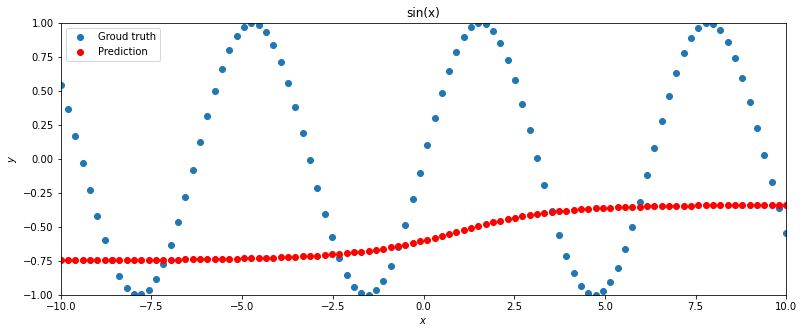

In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

# Train dataset
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0

y_train = torch.sin(x_train)

#plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

# noise
noise = torch.randn(y_train.shape) / 5.

#plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

#noisy sin(x)
y_train = y_train + noise
#plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

# validation dataset
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
#plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

# ??
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# model constuction
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        #self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        #self.act2 = torch.nn.Sigmoid()
        #self.act2 = torch.nn.Tahn()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        #x = self.act2(x)
        #x = self.fc3(x)
        return x

sine_net = SineNet(3) 

#sine_net = SineNet(int(input()))
#sine_net.forward(torch.Tensor([1.]))
#print(sine_net)

# ??
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

# optimazer
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# loss function
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

